In [3]:
# our problem statement: To help retail companies reduce shrinkage from their outlets to maximize their profits
# model to be used : Logistic regression, we are gonna classify it as either a low shrinkage outlet or a high shrinkage outlet

In [6]:
# so we are gonna create our own sythetic dataset for this 

import pandas as pd
import numpy as np

# Parameters for dataset generation
num_stores = 1000
np.random.seed(42)  # For reproducibility

# Generate synthetic data
store_ids = [f"Store_{i+1}" for i in range(num_stores)]
locations = np.random.choice(['Urban', 'Suburban', 'Rural'], size=num_stores, p=[0.5, 0.3, 0.2])
staff_count = np.random.randint(5, 51, size=num_stores)
total_sales = np.random.uniform(10000, 200000, size=num_stores)
inventory = np.random.uniform(5000, 150000, size=num_stores)
shrinkage_loss = np.random.uniform(200, 20000, size=num_stores)

# Calculate shrinkage level based on threshold
# the shrinkage level is being calculated based on the losses that have been occured in the stores
shrinkage_level = [
    "High" if loss > 0.1 * inv else "Low"
    for loss, inv in zip(shrinkage_loss, inventory)
]

# Create the DataFrame
data = pd.DataFrame({
    "store_id": store_ids,
    "location": locations,
    "staff_count": staff_count,
    "total_sales": total_sales,
    "inventory": inventory,
    "shrinkage_loss": shrinkage_loss,
    "shrinkage_level": shrinkage_level
})

# Saving to a CSV file
data.to_csv("synthetic_shrinkage_data.csv", index=False)

print("Synthetic dataset created and saved as 'synthetic_shrinkage_data.csv'.")


Synthetic dataset created and saved as 'synthetic_shrinkage_data.csv'.


In [7]:
# now we proceed for the data analysis where we try to understand the patterns between the different features given

In [8]:
#dataset overview:
print(data.head())

  store_id  location  staff_count    total_sales      inventory  \
0  Store_1     Urban           16   71280.315791  101695.665780   
1  Store_2     Rural           20   14349.826745  124379.867324   
2  Store_3  Suburban           28   39220.318437  118392.223565   
3  Store_4  Suburban           23   52486.742554   83851.830541   
4  Store_5     Urban           12  191891.348700   19480.689065   

   shrinkage_loss shrinkage_level  
0    13973.368117            High  
1    12293.260468             Low  
2     4156.857171             Low  
3     1299.395650             Low  
4    11455.604990            High  


In [9]:
# dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   store_id         1000 non-null   object 
 1   location         1000 non-null   object 
 2   staff_count      1000 non-null   int32  
 3   total_sales      1000 non-null   float64
 4   inventory        1000 non-null   float64
 5   shrinkage_loss   1000 non-null   float64
 6   shrinkage_level  1000 non-null   object 
dtypes: float64(3), int32(1), object(3)
memory usage: 50.9+ KB


In [10]:
# stats summary:
data.describe()

,staff_count,total_sales,inventory,shrinkage_loss
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,27.457000,104105.410913,80770.904886,9677.164396
std,13.257523,55699.484392,41037.259797,5748.380143
min,5.000000,10035.795916,5064.203308,203.693258
25%,16.000000,53470.601661,47254.140808,4673.945205
50%,27.000000,104375.119871,82525.414096,9369.433724
75%,39.000000,152428.142848,115887.241887,14672.791261
max,50.000000,199945.622790,149933.868214,19952.931881


In [11]:
# now we proceed for checking of any missing values in the dataset
print(data.isnull().sum())

store_id           0
location           0
staff_count        0
total_sales        0
inventory          0
shrinkage_loss     0
shrinkage_level    0
dtype: int64


In [12]:
# we have obtained 0 indicating that there is no missing data present in the dataset

In [13]:
# so now we will do the visualization of the dataset

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

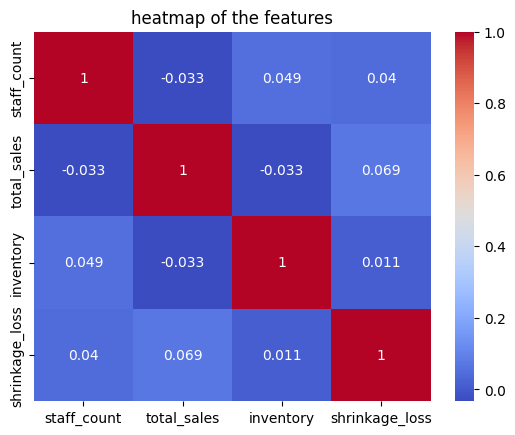

In [18]:
# for visulaization first we form the heatmap
features = ["staff_count", "total_sales", "inventory", "shrinkage_loss"]
sns.heatmap(data[features].corr(), annot=True, cmap="coolwarm")
plt.title('heatmap of the features')
plt.show()


In [19]:
# similarly we can use some other visulaiation tools such as box plot, count plot etc

In [20]:
# we are now gonna encode those features which are categorical before we feed them into the model so as to convert them to a numerical data 

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
# we first encode the location
data['location']=le.fit_transform(data['location'])

In [26]:
# now we are going to encode the shrinkage level
data['shrinkage_level']=le.fit_transform(data['shrinkage_level'])

In [49]:

data['store_id'] = le.fit_transform(data['store_id'])

In [50]:
# we now have to scale the features to ensure that all the features contribute equally to the model

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [52]:
# we are making use of z-score scaling
data[["staff_count","total_sales", "inventory","shrinkage_loss"]] = sc.fit_transform(data[["staff_count","total_sales", "inventory","shrinkage_loss"]])

In [53]:
# now we proceed with the splitting of data and the model training and testing
from sklearn.model_selection import train_test_split

In [54]:
x = data.drop('shrinkage_level', axis = 1)
y = data['shrinkage_level']

In [55]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [56]:
# now we are going to import the model
from sklearn.linear_model import LogisticRegression

In [57]:
lr = LogisticRegression()

In [58]:
# now we are going to fit the training data in the model

In [59]:
lr.fit(x_train,y_train)

LogisticRegression()

In [60]:
y_pred = lr.predict(x_test)

In [61]:
from sklearn.metrics import accuracy_score,f1_score,precision_score

In [62]:
# now we are going to check the accuracy of the model

In [63]:
accuracy = accuracy_score(y_test,y_pred)

In [64]:
print(accuracy)

0.99


In [65]:
precision = precision_score(y_test,y_pred)

In [67]:
print(precision)

1.0


In [68]:
f1 = f1_score(y_test,y_pred)

In [69]:
print(f1)

0.9882352941176471


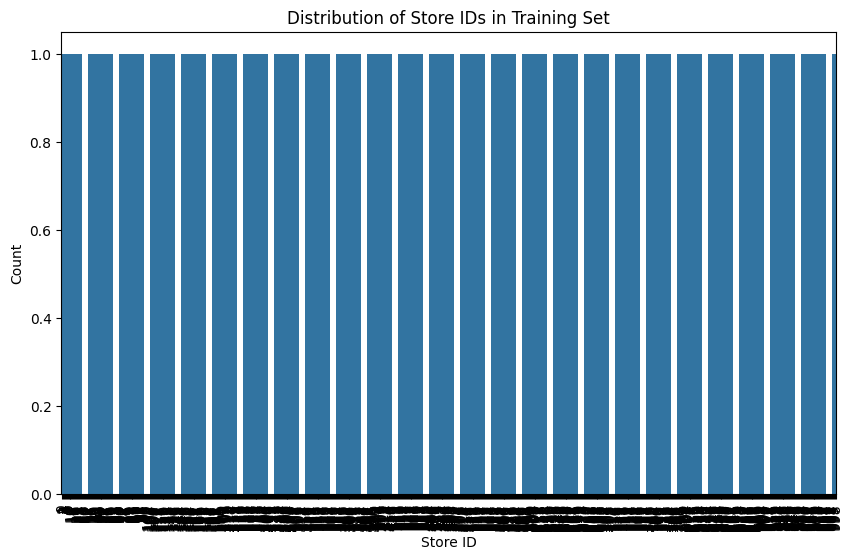

In [70]:
plt.figure(figsize=(10, 6))
sns.countplot(x='store_id', data=x_train)
plt.title('Distribution of Store IDs in Training Set')
plt.xlabel('Store ID')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()